# 09wk-2: 중간고사

최규빈  
2024-05-03

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/09wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import requests
import PIL
import io

# 1. 학번소개 – 40점

> 1.  20점, (2) 20점

아래의 코드를 실행하여 MNIST 자료를 불러오라.

In [3]:
# URL 설정
url = 'https://github.com/guebin/PP2023/raw/main/posts/02_DataScience/mnist.npz'

# URL에서 파일 다운로드
urllib.request.urlretrieve(url, './mnist.npz')

# 데이터 로드
data = np.load('./mnist.npz')
xtrain, ytrain, xtest, ytest = data['x_train']/255, data['y_train'], data['x_test']/255, data['y_test']

# mnist.npz 삭제
!rm mnist.npz

`(1)` xtrain, xtest, ytrain, ytest 의 shape은 각각 아래와 같다.

In [7]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

xtrain, xtest를 합쳐서 shape이 (70000,28,28) 인 numpy array를 생성하고
이것을 `X`에 저장하라. 저장된 `X`에서 각 숫자의 평균이미지를 구하고
평균이미지를 좌우로 붙여 본인의 학번 마지막 5자리를 출력하라. (충남대
학생들은 충남대 학번으로 쓰셔도 괜찮습니다)

`(풀이)`

In [10]:
X = np.concatenate([xtrain,xtest],axis=0)
y = np.concatenate([ytrain,ytest])

In [36]:
lst = [
    X[y == 4].mean(axis=0),
    X[y == 3].mean(axis=0),
    X[y == 0].mean(axis=0),
    X[y == 5].mean(axis=0),
    X[y == 2].mean(axis=0)
]
img = np.concatenate(lst,axis=-1)

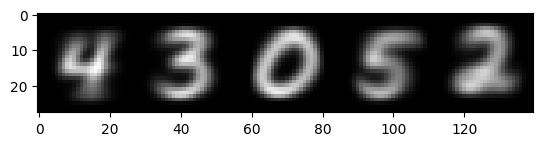

In [37]:
plt.imshow(img,cmap="gray")

`(2)` (1)에서 구한 평균이미지와 가장 차이가 작은 이미지를 숫자별로 찾고,
이를 이어서 (1)처럼 본인의 학번 마지막 5개의 숫자를 출력하라. 이때
평균이미지와의 차이는 픽셀별로 차이를 제곱한뒤 평균을 내서 계산한다.
(07wk-2 // 5.numpy활용 // C.MNIST data // (5)번 문항을 참고할 것)

`(풀이)`

In [42]:
lst = [
    X[y == 4][((X[y == 4] - X[y == 4].mean(axis=0))**2).mean(axis=(1,2)).argmin()],
    X[y == 3][((X[y == 3] - X[y == 3].mean(axis=0))**2).mean(axis=(1,2)).argmin()],
    X[y == 0][((X[y == 0] - X[y == 0].mean(axis=0))**2).mean(axis=(1,2)).argmin()],
    X[y == 5][((X[y == 5] - X[y == 5].mean(axis=0))**2).mean(axis=(1,2)).argmin()],
    X[y == 2][((X[y == 2] - X[y == 2].mean(axis=0))**2).mean(axis=(1,2)).argmin()],
]
img = np.concatenate(lst,axis=-1)

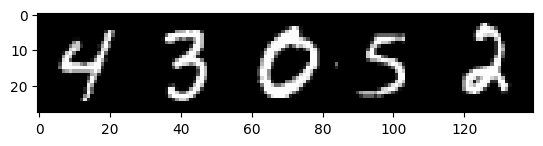

In [43]:
plt.imshow(img,cmap="gray")

# 2. 아름다운 부산 – 40점

> (1)-(2) 모두 맞출 경우만 정답으로 인정

아래의 코드를 실행하여 부산의 야경을 불러오라.

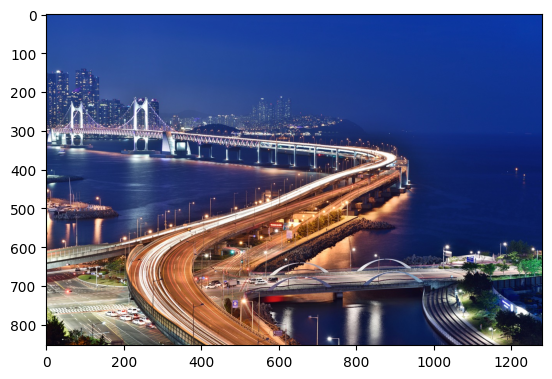

In [78]:
url = 'https://cdn.pixabay.com/photo/2016/10/17/07/53/busan-night-scene-1747130_1280.jpg'
img = np.array(PIL.Image.open(io.BytesIO(requests.get(url).content)))/255
plt.imshow(img)

In [79]:
img.shape

`(1)` 위의 이미지의 Red,Green,Blue 에 해당하는 array 를 변수 `R`, `G`,
`B` 에 저장하라. 아래의 공식을 이용하여 새로운 numpy array Gray를 만들고
이를 출력하라.

$$Gray = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$

여기에서 R,G,B,Gray는 모두 shape이 (854,1280) 인 numpy array 이다.

`(풀이)`

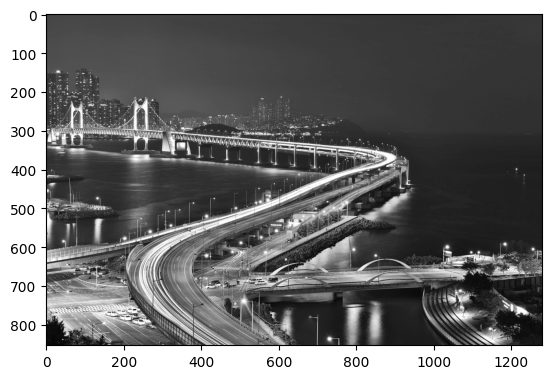

In [463]:
R,G,B = img[:,:,0],img[:,:,1],img[:,:,2]
Gray = 0.2989*R + 0.5870*G + 0.1140*B 
plt.imshow(Gray,cmap="gray")

`(2)` `R`,`G`,`B` 에 대하여 아래의 슈도-알고리즘과 동등한 처리를
`np.where`을 이용하여 수행하라. 편의상 아래의 알고리즘에서 `R`,`G`,`B`는
변수 `Ch`로 생각한다.

``` python
ch_min = np.min(Ch[0:587, 948:1210])
ch_max = np.max(Ch[0:587, 948:1210]) 
for i in range(854):
    for j in range(1280):
        if ch_min < Ch[i,j] < ch_max:
            Ch[i,j] = Gray[i,j]
        else: 
            Ch[i,j] = Ch[i,j]
```

위의 알고리즘을 각각 `R`, `G`, `B`에 적용하였으면 변화된 `R`,`G`,`B`를
합쳐서 하나의 칼라이미지를 만들고 출력하라.

`(풀이)`

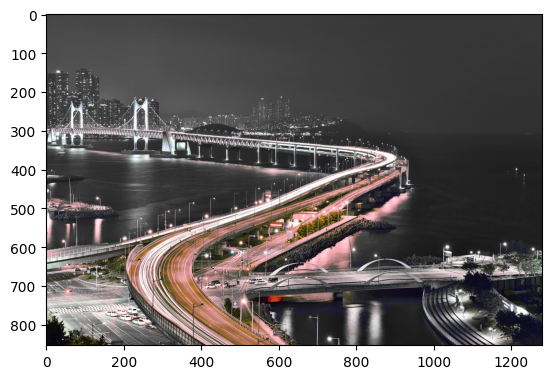

In [464]:
def f(Ch):
    ch_min = np.min(Ch[0:587, 948:1210])
    ch_max = np.max(Ch[0:587, 948:1210]) 
    Ch = np.where((ch_min < Ch) & (Ch < ch_max), Gray, Ch)
    return Ch
solution = np.stack(list(map(f,[R,G,B])),axis=-1) 
plt.imshow(solution)

# 3. 공든탑쌓기 – 120점

규빈과 다호가 블록을 사용하여 탑을 쌓는다. 규빈은 한 번에 2개의 블록을
사용하여 탑을 쌓지만, 실수로 탑을 무너뜨릴 확률이 50%이다. 한 번 무너진
탑은 다시 처음부터 쌓아야 한다. 다호는 한 번에 1개의 블록을 사용하여
신중하게 탑을 쌓는다. 다호는 천천히 탑을 쌓지만 실수로 탑을 무너뜨리지
않는다.

> (1)번은 0점, (2)-(3)을 모두 맞출경우 60점, (2)-(4)를 모두 맞출경우
> 120점

`(1)` 규빈과 다호가 2층 높이의 탑을 먼저 쌓는 내기를 하였다고 하자. 탑을
쌓을수 있는 기회는 2회 준다. 이 내기는 누가 유리한가? 시뮬레이션을
통하여 근거를 설명하라. (둘이 동시에 탑을 쌓을경우 무승부로 판단한다.)

`(풀이)`

In [475]:
def build_tower(max_time, end_condition):    
    guebin = 0
    daho = 0
    for t in range(max_time): # max_time 동안 게임을 진행 
        #--# 블록을 쌓음 
        if np.random.rand() < 0.5:  # 규빈이 탑 쌓다가 실수로 무너짐
            guebin = 0 
            daho = daho + 1 
        else: # 규빈이 탑을 잘 쌓음 
            guebin = guebin + 2  
            daho = daho + 1 
        #--# 승패를 체크
        if (guebin >= end_condition) and (daho >= end_condition):
            result = "무승부 (둘이 동시에 성공)"
            break # 규빈,다호의 성공으로 게임 종료
        elif (guebin >= end_condition) and (daho < end_condition):
            result = "규빈승"
            break # 규빈의 성공으로 게임 종료 
        elif (guebin < end_condition) and (daho >= end_condition):
            result = "다호승"
            break # 다호의 성공으로 게임 종료 
        else: 
            result = "무승부 (둘다 쌓지 못함)" # 둘다 max_time동안 탑을 쌓지 못함. 
    return result 

In [476]:
results = [build_tower(max_time=2,end_condition=2) for i in range(1000)]
{s:results.count(s) for s in set(results)}

규빈이 유리하다.

`(2)` 규빈과 다호가 10층 높이의 탑을 먼저 쌓는 내기를 하였다고 하자.
탑을 쌓을수 있는 기회는 10회 준다. 이 내기는 누가 유리한가? 시뮬레이션을
통하여 근거를 설명하라. (둘이 동시에 탑을 쌓을경우 무승부로 판단한다.)

`(풀이)`

In [477]:
results = [build_tower(max_time=10,end_condition=10) for i in range(1000)]
{s:results.count(s) for s in set(results)}

다호가 유리하다.

`(3)` 규빈은 (2)의 게임을 반복하다가 본인이 불리하다는 사실을 알고
분노했다. 흑화한 규빈은 매번 50%의 확률로 다호의 탑을 공격하기로 하였다.
공격 성공률은 60% 이며 공격이 성공시 다호의 탑은 모두 무너진다. (단,
공격시 규빈은 탑을 쌓을 수 없다) 규빈과 다호에게 탑을 쌓거나 상대방의
탑을 공격할 기회를 20회 준다고 가정하자. 이 내기는 누가 유리한가?
시뮬레이션을 통하여 근거를 설명하라. (둘이 동시에 탑을 쌓거나 둘 모두
탑을 쌓지 못할 경우 무승부로 판단한다.)

`(풀이)`

In [478]:
def build_tower3(max_time, end_condition):
    guebin = 0
    daho = 0
    for t in range(max_time): # max_time 동안 게임을 진행 
        #--# 블록을 쌓음         
        if np.random.rand() < 0.5: # 규빈이 공격하기로 마음먹음
            if np.random.rand() < 0.6: # 공격성공 
                daho = 0 
            else: # 공격실패 
                daho = daho + 1 
        else: # 규빈이 공격안하고 탑 쌓기로 마음먹음 
            if np.random.rand() < 0.5: # 규빈이 탑 쌓다가 실수로 무너짐
                guebin = 0 
                daho = daho + 1 
            else: # 규빈이 탑을 잘 쌓음 
                guebin = guebin + 2  
                daho = daho + 1 
        #--# 승패를 체크
        if (guebin >= end_condition) and (daho >= end_condition):
            result = "무승부 (둘이 동시에 성공)"
            break
        elif (guebin >= end_condition) and (daho < end_condition):
            result = "규빈승"
            break
        elif (guebin < end_condition) and (daho >= end_condition):
            result = "다호승"
            break
        else: 
            result = "무승부 (둘다 쌓지 못함)"
    return result 

In [479]:
results = [build_tower3(max_time=20,end_condition=10) for i in range(10000)]
{s:results.count(s) for s in set(results)}

규빈과 다호가 비슷하게 유리하다.

`(4)` 규빈은 공격을 하는사이에 본인의 탑을 쌓지 못하게 되자 전략을
바꾸었다. 다호의 탑을 관찰하며, 다호의 탑이 5층 이상인 경우에만
공격하기로 하였다. 이 경우 규빈과 다호에게 탑을 쌓거나 상대방의 탑을
공격할 기회를 20회 준다고 가정하면 누가 유리한가? 시뮬레이션을 통하여
근거를 설명하라. (둘이 동시에 탑을 쌓거나 둘 모두 탑을 쌓지 못할 경우
무승부로 판단한다.)

`(풀이)`

In [480]:
def build_tower4(max_time, end_condition):
    guebin = 0
    daho = 0
    for t in range(max_time): # max_time 동안 게임을 진행 
        #--# 블록을 쌓음           
        if daho >= 5: # 다호의 탑이 5층이상이 되어 규빈이 공격하기로 마음먹음
            if np.random.rand() < 0.6: # 공격성공 
                daho = 0 
            else: # 공격실패 
                daho = daho + 1 
        else: # 규빈이 공격안하고 탑 쌓기로 마음먹음 
            if np.random.rand() < 0.5: # 규빈이 탑 쌓다가 실수로 무너짐
                guebin = 0 
                daho = daho + 1 
            else: # 규빈이 탑을 잘 쌓음 
                guebin = guebin + 2  
                daho = daho + 1 
        #--# 승패를 체크
        if (guebin >= end_condition) and (daho >= end_condition):
            result = "무승부 (둘이 동시에 성공)"
            break
        elif (guebin >= end_condition) and (daho < end_condition):
            result = "규빈승"
            break
        elif (guebin < end_condition) and (daho >= end_condition):
            result = "다호승"
            break
        else: 
            result = "무승부 (둘다 쌓지 못함)"
    return result 

In [481]:
results = [build_tower4(max_time=20,end_condition=10) for i in range(10000)]
{s:results.count(s) for s in set(results)}

규빈이 유리하다.